In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,date
import pytz
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
print("X equals")
print(X)
print(len(X[0]))
print("y equals")
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
print(X_train,y_train)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

X equals
[[ 4.35964951e-01  6.56278975e-01  4.80179809e-04 ... -2.17373330e+00
  -4.53751512e-01 -1.53885818e-01]
 [-1.04054030e+00 -2.19631333e-03  1.41229617e+00 ... -1.24838837e+00
   3.09657106e-01  7.13107100e-01]
 [-6.28817482e-01 -4.36684080e-01  1.49088673e-01 ...  1.16895233e+00
  -9.38234025e-03 -1.40959504e+00]
 ...
 [ 1.58814951e+00  6.05600808e-01 -1.65709505e+00 ...  6.75282576e-01
  -8.59941103e-01  1.03056340e+00]
 [-8.57014517e-01  1.21629894e+00  9.70696111e-01 ...  1.47511687e+00
   1.21356892e+00 -9.84514530e-01]
 [-2.45389193e+00 -1.43403073e+00  5.40533161e-01 ...  9.52547818e-01
   5.49421827e-01  2.07229946e-01]]
100
y equals
[-3.85217603e+01  1.12467601e+02 -3.44345090e+02  1.82630283e+02
  2.39473441e+02 -5.29145377e+01 -1.90797752e+01  1.48663488e+02
  9.59532286e+01 -2.08045947e+01 -4.99385124e+01  9.97128986e+01
 -1.04668089e+02  1.89481810e+02 -2.16615457e+02 -2.17710850e+02
 -1.63052960e+02  1.71269972e+02  1.98236402e+02 -1.33636109e+02
  1.03148910e+02 

/opt/miniconda3/envs/trading/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076595

In [3]:
def get_stock_data(ticker,start,end):
    start_date = date.fromisoformat(start)
    end_date = date.fromisoformat(end)
    start_stamp = int(datetime(start_date.year, start_date.month, start_date.day, tzinfo=pytz.UTC).timestamp())
    end_stamp = int(datetime(end_date.year, end_date.month, end_date.day, tzinfo=pytz.UTC).timestamp())
    print(start_date, end_date)
    #start_stamp = datetime.timestamp(start_date)
    #end_stamp = datetime.timestamp(end_date)
    print(start_stamp,end_stamp)
    url = "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%i&period2=%i&interval=1d&events=history&includeAdjustedClose=true" % (ticker,start_stamp, end_stamp)
    print(url)
    stock = pd.read_csv(url)
    print(stock)
    # Create a MinMaxScaler object

    scaler = MinMaxScaler()
    # Define the column to leave unchanged
    unchanged_column = 'Date'

    # Create a subset of columns excluding the unchanged column
    columns_to_scale = [col for col in stock.columns if col != unchanged_column]

    # Copy the DataFrame
    stock_normalized = stock.copy()

    # Apply MinMaxScaler to the subset of columns
    stock_normalized[columns_to_scale] = scaler.fit_transform(stock[columns_to_scale])

    print(stock_normalized)
    
    # Concatenate the normalized subset with the unchanged column
    stock_normalized = pd.concat([stock_normalized[unchanged_column], stock_normalized[columns_to_scale]], axis=1)
    return stock_normalized



In [4]:
Itau = get_stock_data("ITUB4.SA","2021-01-01","2021-12-31")
Vale = get_stock_data("VALE3.SA","2021-01-01","2021-12-31")
Itau.merge(Vale)
print(Itau)
print(type(Itau)) 
df = result = pd.concat([Vale, Itau], axis=1, keys=['Vale', 'Itau'])
print(df)
df_reshaped = df.stack().unstack(level=[1]).reset_index(drop=True)
print(df_reshaped)
print(df_reshaped.iloc[:, :-1].values)

2021-01-01 2021-12-31
1609459200 1640908800
https://query1.finance.yahoo.com/v7/finance/download/ITUB4.SA?period1=1609459200&period2=1640908800&interval=1d&events=history&includeAdjustedClose=true
           Date       Open       High        Low      Close  Adj Close  \
0    2021-01-04  31.980000  31.990000  30.840000  30.900000  26.280027   
1    2021-01-05  30.730000  31.059999  30.170000  30.700001  26.109938   
2    2021-01-06  30.980000  32.060001  30.790001  31.600000  26.875378   
3    2021-01-07  31.650000  33.060001  31.500000  32.830002  27.921473   
4    2021-01-08  32.930000  33.439999  32.430000  32.820000  27.912968   
..          ...        ...        ...        ...        ...        ...   
242  2021-12-23  21.330000  21.570000  21.170000  21.340000  18.787279   
243  2021-12-27  21.480000  21.700001  21.309999  21.559999  18.980961   
244  2021-12-28  21.629999  21.700001  21.400000  21.480000  18.910532   
245  2021-12-29  21.530001  21.580000  21.230000  21.299999  18

/var/folders/k_/w3z0rb550bq5y149v61zw1lw0000gn/T/ipykernel_73357/3968699059.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_reshaped = df.stack().unstack(level=[1]).reset_index(drop=True)


In [5]:
print(df.xs("Adj Close",axis=1,level=1))
xsdf = df.xs("Adj Close",axis=1,level=1)
print(len(xsdf))
Train_Data = xsdf[:round(len(xsdf)/2)]
print(Train_Data)
Test_Data = xsdf[round(len(xsdf)/2)+1:]
print(Test_Data)

         Vale      Itau
0    0.350917  0.759611
1    0.380716  0.743123
2    0.439732  0.817322
3    0.561053  0.918728
4    0.554861  0.917904
..        ...       ...
242  0.382866  0.033283
243  0.378313  0.052058
244  0.335065  0.045231
245  0.339617  0.029868
246  0.355779  0.000000

[247 rows x 2 columns]
247
         Vale      Itau
0    0.350917  0.759611
1    0.380716  0.743123
2    0.439732  0.817322
3    0.561053  0.918728
4    0.554861  0.917904
..        ...       ...
119  0.861842  0.762161
120  0.901227  0.737038
121  0.916487  0.707726
122  0.875864  0.699767
123  0.923291  0.726578

[124 rows x 2 columns]
         Vale      Itau
125  0.927209  0.688036
126  0.934014  0.698929
127  0.924941  0.666251
128  0.954016  0.699767
129  0.968038  0.714849
..        ...       ...
242  0.382866  0.033283
243  0.378313  0.052058
244  0.335065  0.045231
245  0.339617  0.029868
246  0.355779  0.000000

[122 rows x 2 columns]


In [6]:
#print(df.xs("Adj Close",axis=1,level=1))
#xsdf = df.xs("Adj Close",axis=1,level=1)
#train_mask = (xsdf["Date"] > "2021-01-01") &  (xsdf["Date"] < "2021-07-01")
#Train_Data = xsdf[train_mask]
#print(Train_Data["Adj Close"])
#print(type(Train_Data["Adj Close"]))
#test_mask = (xsdf["Date"] >= "2021-07-01") & (xsdf["Date"] <= "2021-12-31")
#
#Test_Data=xsdf[test_mask]
#print(Test_Data["Adj Close"])

In [7]:
rwin = 10
offset = 30
Sample_Array = []
Result_Array = []
scaler = MinMaxScaler()
Test_Sample_Array = []
Test_Result_Array = []

columns = ["Vale","Itau"]
Normalized_Train_Data = Train_Data.copy() 
Normalized_Test_Data = Test_Data.copy()
# Create a subset of columns excluding the unchanged column
columns_to_scale = [col for col in Train_Data.columns]


Normalized_Train_Data[columns_to_scale] = scaler.fit_transform(Train_Data[columns_to_scale])
Normalized_Test_Data[columns_to_scale] = scaler.fit_transform(Test_Data[columns_to_scale])
print(Normalized_Train_Data)
print(Normalized_Test_Data)

         Vale      Itau
0    0.104372  0.669949
1    0.146670  0.647311
2    0.230442  0.749187
3    0.402655  0.888415
4    0.393866  0.887283
..        ...       ...
119  0.829619  0.673451
120  0.885526  0.638957
121  0.907186  0.598712
122  0.849523  0.587785
123  0.916845  0.624596

[124 rows x 2 columns]
         Vale      Itau
125  0.927209  0.831381
126  0.934014  0.844544
127  0.924941  0.805058
128  0.954016  0.845556
129  0.968038  0.863781
..        ...       ...
242  0.382866  0.040217
243  0.378313  0.062903
244  0.335065  0.054654
245  0.339617  0.036091
246  0.355779  0.000000

[122 rows x 2 columns]


In [8]:
for i in range(0,len(Train_Data["Vale"])-rwin - offset):
    Sample = Normalized_Train_Data["Vale"].iloc[i:i+rwin]
    Sample_Array.append(Sample)
    Result = Normalized_Train_Data["Vale"].iloc[i+rwin]
#    print("Sample size =", len(Sample))
#    print("i+rwin=", i+rwin+1)
    Result_Array.append(Result)
for i in range(0,len(Test_Data["Vale"])-rwin - offset):
    Test_Sample = Normalized_Test_Data["Vale"].iloc[i:i+rwin]
    Test_Sample_Array.append(Test_Sample)
    Test_Result = Normalized_Test_Data["Vale"].iloc[i+rwin + offset]
    Test_Result_Array.append(Test_Result)
print(Sample_Array)
#print(Result_Array)
print(Test_Sample_Array)
#print(Test_Result_Array)

[0    0.104372
1    0.146670
2    0.230442
3    0.402655
4    0.393866
5    0.393317
6    0.316686
7    0.235112
8    0.278508
9    0.161777
Name: Vale, dtype: float64, 1     0.146670
2     0.230442
3     0.402655
4     0.393866
5     0.393317
6     0.316686
7     0.235112
8     0.278508
9     0.161777
10    0.182650
Name: Vale, dtype: float64, 2     0.230442
3     0.402655
4     0.393866
5     0.393317
6     0.316686
7     0.235112
8     0.278508
9     0.161777
10    0.182650
11    0.175784
Name: Vale, dtype: float64, 3     0.402655
4     0.393866
5     0.393317
6     0.316686
7     0.235112
8     0.278508
9     0.161777
10    0.182650
11    0.175784
12    0.127993
Name: Vale, dtype: float64, 4     0.393866
5     0.393317
6     0.316686
7     0.235112
8     0.278508
9     0.161777
10    0.182650
11    0.175784
12    0.127993
13    0.156558
Name: Vale, dtype: float64, 5     0.393317
6     0.316686
7     0.235112
8     0.278508
9     0.161777
10    0.182650
11    0.175784
12    0.127993

In [16]:
regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(20,30,30,20)).fit(Sample_Array, Result_Array)
Res = pd.DataFrame({"Prediction":regr.predict(Test_Sample_Array[:])})
print(len(Sample_Array) + rwin,len(Sample_Array) + len(Test_Sample_Array))
print(len(Train_Data) + rwin + offset,len(Train_Data) + len(Test_Data)+ rwin+offset)
print(len(Res))
New_index_values = range(len(Train_Data) + rwin + offset,len(Train_Data) + len(Test_Data))
Res.index = New_index_values
print(Res)

94 166
164 286
82
     Prediction
164    1.044062
165    1.040892
166    1.033203
167    1.014261
168    1.003901
..          ...
241    0.396920
242    0.351288
243    0.345062
244    0.327070
245    0.366190

[82 rows x 1 columns]


In [17]:
Train_Res = pd.DataFrame({"Prediction":regr.predict(Sample_Array[:])})
print(len(Sample_Array) + rwin,len(Sample_Array) + len(Test_Sample_Array))
New_index_values = range(rwin + offset,len(Train_Data))
Train_Res.index = New_index_values
print(Train_Res)

94 166
     Prediction
40     0.520122
41     0.479248
42     0.443695
43     0.449492
44     0.443760
..          ...
119    0.982078
120    1.002336
121    1.000228
122    1.021684
123    0.969510

[84 rows x 1 columns]


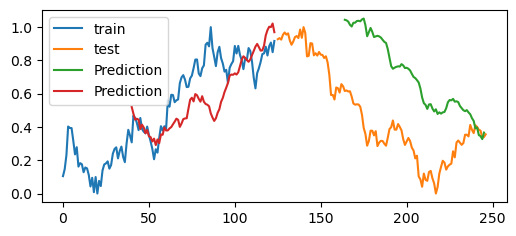

In [18]:
fig, ax = plt.subplots(figsize=(6, 2.5))
Normalized_Train_Data['Vale'].plot(ax=ax, label='train')
Normalized_Test_Data['Vale'].plot(ax=ax, label='test')
Res.plot(ax=ax,label="Prediction")
Train_Res.plot(ax=ax,label="Train_Prediction")
ax.legend();

In [ ]:
class TechnicalIndicators():
    def __init__(self, data_frame):
        self.df = data_frame.copy()

    def momentum(self, n, offset=0):
        if f'momentum_{n}' not in self.df.columns:
            close_prices = self.df['Close'].iloc[offset:]
            momentum = close_prices / close_prices.shift(n) - 1
            self.df[f'momentum_{n}'] = momentum
        return self.df[f'momentum_{n}']

    def simple_movement_average(self, n, offset=0):
        if f'sma_{n}' not in self.df.columns:
            window_mean = self.df['Close'].iloc[offset:].rolling(n).mean()
            self.df[f'sma_{n}'] = self.df['Close'] / window_mean - 1
        return self.df[f'sma_{n}']

    def _get_bollinger_bands(self, rm, rstd):
        upper_band = rm + rstd * 2
        lower_band = rm - rstd * 2
        return upper_band, lower_band

    def bollinger_bands(self, window_size=20, offset=0):
        if 'upper_band' not in self.df.columns:
            self.df['mm20'] = self.df['Close'].iloc[offset:].rolling(window_size).mean()
            rstd = self.df['Close'].iloc[offset:].rolling(window_size).std()
            self.df['upper_band'], self.df['lower_band'] = self._get_bollinger_bands(self.df['mm20'], rstd)
        return self.df[['Close', 'mm20', 'upper_band', 'lower_band']]

    def add_daily_return(self):
        self.df['daily_return'] = (self.df['Close'] / self.df['Close'].shift(1)) - 1
        self.df.loc['daily_return',0:1] = 0
        self.df['cumulative_return'] = (self.df['Close'] / self.df['Close'].values[0]) - 1
        self.df.loc['cumulative_return',0:1] = 0

In [ ]:
TF = TechnicalIndicators(Itau)
print(TF.df)
print(type(TF.df))
print(TF.momentum(15))
print(TF.simple_movement_average(15))
print(TF.bollinger_bands(15))
print(TF.add_daily_return())
print(TF.df)

In [ ]:
Train = Itaú